In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import soundfile as sf

% matplotlib inline

In [2]:
file_loc = '../data/LibriSpeech/dev-clean/84/121123/84-121123-0000.flac'

with open(file_loc, 'rb') as f:
    data, samplerate = sf.read(f)

print (data, samplerate)

[ 0.  0.  0. ...,  0.  0.  0.] 16000


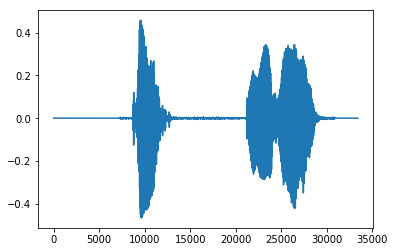

In [7]:
plt.plot(data)

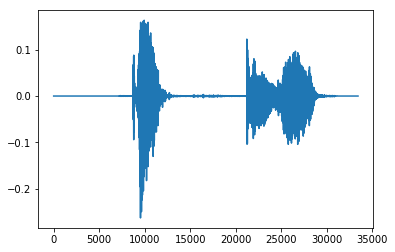

In [15]:
def apply_pre_emphasis(data, pre_emphasis = 0.97):
    return np.append(data[0], data[1:] - pre_emphasis * data[:-1])
plt.plot(apply_pre_emphasis(data, 0.97))

In [16]:
signal = apply_pre_emphasis(data)

In [33]:
frame_size_in_ms = 25
frame_stride_in_ms = 10

frame_size = frame_size_in_ms/1000.
frame_stride = frame_stride_in_ms/1000.

frame_length = frame_size * samplerate
frame_step = frame_stride * samplerate

signal_length = len(signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))

num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

In [57]:
windowed_frames = frames * np.hamming(frame_length)

In [62]:
NFFT = 512

mag_frames = np.abs(np.fft.rfft(windowed_frames, NFFT))
power_frames = (mag_frames ** 2) * (1/NFFT)